<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Einleitung" data-toc-modified-id="Einleitung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Einleitung</a></span></li><li><span><a href="#Verwendeter-Datensatz" data-toc-modified-id="Verwendeter-Datensatz-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Verwendeter Datensatz</a></span></li><li><span><a href="#Daten-einlesen" data-toc-modified-id="Daten-einlesen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Daten einlesen</a></span></li><li><span><a href="#Kategoriale-Spalten-verwenden" data-toc-modified-id="Kategoriale-Spalten-verwenden-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kategoriale Spalten verwenden</a></span></li><li><span><a href="#Spalten-selektieren,-Daten-plotten" data-toc-modified-id="Spalten-selektieren,-Daten-plotten-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spalten selektieren, Daten plotten</a></span></li><li><span><a href="#Daten-normalisieren" data-toc-modified-id="Daten-normalisieren-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Daten normalisieren</a></span></li><li><span><a href="#Trainings--und-Testdaten-definieren" data-toc-modified-id="Trainings--und-Testdaten-definieren-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trainings- und Testdaten definieren</a></span></li><li><span><a href="#MLP-vorbereiten" data-toc-modified-id="MLP-vorbereiten-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MLP vorbereiten</a></span></li><li><span><a href="#MLP-trainieren" data-toc-modified-id="MLP-trainieren-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>MLP trainieren</a></span></li><li><span><a href="#Modell-testen/anwenden" data-toc-modified-id="Modell-testen/anwenden-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Modell testen/anwenden</a></span></li><li><span><a href="#Modell-speichern" data-toc-modified-id="Modell-speichern-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Modell speichern</a></span></li><li><span><a href="#Modell-wiederherstellen-und-anwenden" data-toc-modified-id="Modell-wiederherstellen-und-anwenden-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Modell wiederherstellen und anwenden</a></span></li><li><span><a href="#Sensitivitätsanalyse" data-toc-modified-id="Sensitivitätsanalyse-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Sensitivitätsanalyse</a></span></li></ul></div>

# Einleitung

In diesem Jupyter-Notebook durchlaufen wir alle relevanten Schritte des Machine-Learnings:
1. Daten einlesen
2. Daten vorverarbeiten
3. Trainings- und Testdaten vorbereiten
4. Machine-Learning Modell definieren (hier: ein MLP)
5. Modell trainieren
6. Modell testen/anwenden
7. Modell speichern/wiederherstellen

# Verwendeter Datensatz

Wir wollen mit realen Daten arbeiten. Bei [Kaggle](https://www.kaggle.com/) können wir viele Datensätze finden. Diesen hier verwenden wir im Folgenden:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Der Datensatz enthält in den Trainingsdaten 1460 Beispiele von Häusern, wobei deren Eigenschaften und deren jeweiliger tatsächlicher Verkaufspreis aufgeführt ist.

# Daten einlesen

Die Datensätze liegen oft als .csv Dateien vor. Diese können mittels der Bibliothek Pandas einfach eingelesen werden.

Wenn Pandas noch nicht installiert ist, kann diese Bibliothek mittels

    conda install pandas

unter der Anaconda Prompt installiert werden.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
print(pd.__version__)

1.2.0


In [3]:
df = pd.read_csv("hausbeispiele.csv")

In [4]:
type( df )

pandas.core.frame.DataFrame

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df2 = pd.get_dummies(df)

In [7]:
df2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df2.shape

(1460, 290)

In [9]:
df[100:105]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Kategoriale Spalten verwenden

In [11]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [12]:
liste_von_spalten = ["YearBuilt", "LotArea", "OverallQual", "MSZoning", "SalePrice"]
kleine_tabelle = df[ liste_von_spalten ]

In [13]:
kleine_tabelle

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000
...,...,...,...,...,...
1455,1999,7917,6,RL,175000
1456,1978,13175,6,RL,210000
1457,1941,9042,7,RL,266500
1458,1950,9717,5,RL,142125


In [14]:
hauser_die_in_wohngebiet_rl_stehen = kleine_tabelle[ kleine_tabelle["MSZoning"] == "RL" ] # boolean indexing

In [15]:
hauser_die_in_wohngebiet_rl_stehen

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000
...,...,...,...,...,...
1455,1999,7917,6,RL,175000
1456,1978,13175,6,RL,210000
1457,1941,9042,7,RL,266500
1458,1950,9717,5,RL,142125


In [16]:
1151/1460

0.7883561643835616

In [17]:
kleine_tabelle_mit_dummy_spalten = pd.get_dummies(kleine_tabelle, columns=["MSZoning"])

In [18]:
kleine_tabelle_mit_dummy_spalten

,YearBuilt,LotArea,OverallQual,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,2003,8450,7,208500,0,0,0,1,0
1,1976,9600,6,181500,0,0,0,1,0
2,2001,11250,7,223500,0,0,0,1,0
3,1915,9550,7,140000,0,0,0,1,0
4,2000,14260,8,250000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1455,1999,7917,6,175000,0,0,0,1,0
1456,1978,13175,6,210000,0,0,0,1,0
1457,1941,9042,7,266500,0,0,0,1,0
1458,1950,9717,5,142125,0,0,0,1,0


In [19]:
kleine_tabelle_mit_dummy_spalten.columns

Index(['YearBuilt', 'LotArea', 'OverallQual', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM'],
      dtype='object')

In [20]:
df = kleine_tabelle_mit_dummy_spalten

In [21]:
df

,YearBuilt,LotArea,OverallQual,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,2003,8450,7,208500,0,0,0,1,0
1,1976,9600,6,181500,0,0,0,1,0
2,2001,11250,7,223500,0,0,0,1,0
3,1915,9550,7,140000,0,0,0,1,0
4,2000,14260,8,250000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1455,1999,7917,6,175000,0,0,0,1,0
1456,1978,13175,6,210000,0,0,0,1,0
1457,1941,9042,7,266500,0,0,0,1,0
1458,1950,9717,5,142125,0,0,0,1,0


# Spalten selektieren, Daten plotten

In [22]:
df["LotArea"]

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [23]:
type( df["OverallQual"] )

pandas.core.series.Series

In [24]:
df["LotArea"].min()

1300

In [25]:
df["LotArea"].max()

215245

In [26]:
df["LotArea"].mean()

10516.828082191782

In [27]:
df["LotArea"].median()

9478.5

In [28]:
gehaelter = [1000,2000,3000,4000,5000000]

In [29]:
import numpy as np
print( np.mean( gehaelter ))
print( np.median( gehaelter ) )

1002000.0
3000.0


In [30]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [31]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
x = df["LotArea"]
y = df["SalePrice"]

In [33]:
type(x)

pandas.core.series.Series

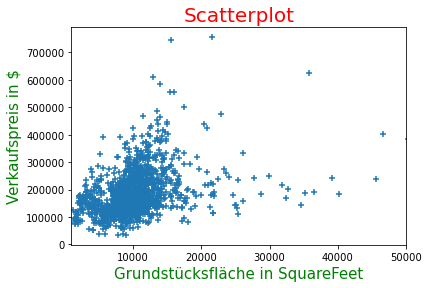

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker="+")
plt.xlabel("Grundstücksfläche in SquareFeet", fontsize=15, color="green")
plt.xlim(1000, 50000)
plt.ylabel("Verkaufspreis in $", fontsize=15, color="green")
plt.title("Scatterplot", fontsize=20, color="red")
plt.show()

In [35]:
liste_von_spalten = ["YearBuilt", "LotArea", "OverallQual",
                     'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
                     'MSZoning_RL', 'MSZoning_RM']

data_input = df[ liste_von_spalten  ].values

nr_inputs = data_input.shape[1]

In [36]:
nr_inputs

8

In [37]:
type( data_input )

numpy.ndarray

In [38]:
data_input.ndim

2

In [39]:
data_input.shape

(1460, 8)

In [40]:
data_input.shape[1]

8

In [41]:
nr_inputs

8

In [42]:
data_input

array([[ 2003,  8450,     7, ...,     0,     1,     0],
       [ 1976,  9600,     6, ...,     0,     1,     0],
       [ 2001, 11250,     7, ...,     0,     1,     0],
       ...,
       [ 1941,  9042,     7, ...,     0,     1,     0],
       [ 1950,  9717,     5, ...,     0,     1,     0],
       [ 1965,  9937,     5, ...,     0,     1,     0]])

In [43]:
data_output = df["SalePrice"].values

In [44]:
data_output

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [45]:
data_output.shape

(1460,)

In [46]:
type( data_output )

numpy.ndarray

In [47]:
data_output.ndim

1

In [48]:
data_output.min()

34900

In [49]:
data_output.max()

755000

# Daten normalisieren

In [50]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
scaled_input_data = scaler_input.fit_transform(data_input)

In [52]:
scaled_input_data

array([[0.94927536, 0.0334198 , 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.75362319, 0.03879502, 0.55555556, ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.04650728, 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5       , 0.03618687, 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.56521739, 0.03934189, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.67391304, 0.04037019, 0.44444444, ..., 0.        , 1.        ,
        0.        ]])

In [53]:
scaled_input_data.shape

(1460, 8)

In [54]:
scaled_input_data[:,0]

array([0.94927536, 0.75362319, 0.93478261, ..., 0.5       , 0.56521739,
       0.67391304])

In [55]:
A = np.zeros( (6,3) )

In [56]:
A = np.arange( 1, 19 )

In [57]:
A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [58]:
A.ndim

1

In [59]:
B = A.reshape( (6,3) )

In [60]:
B

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [61]:
B[2,0]

7

In [62]:
B[:,2]

array([ 3,  6,  9, 12, 15, 18])

In [63]:
type(scaled_input_data)

numpy.ndarray

In [64]:
data_output

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [65]:
scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_output_data = scaler_output.fit_transform(data_output.reshape(-1,1))

In [66]:
scaled_output_data

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

# Trainings- und Testdaten definieren

In [67]:
x_train = scaled_input_data[0:1000]
y_train = scaled_output_data[0:1000]
x_test  = scaled_input_data[1000:]
y_test  = scaled_output_data[1000:]

In [68]:
type(x_train)

numpy.ndarray

In [69]:
x_train.shape

(1000, 8)

In [70]:
y_train.shape

(1000, 1)

In [71]:
x_test.shape

(460, 8)

In [72]:
y_test.shape

(460, 1)

In [73]:
print(x_train[99], "-->", y_train[99])

[0.63043478 0.03748627 0.33333333 0.         0.         0.
 1.         0.        ] --> [0.13060686]


# MLP vorbereiten

In [74]:
nr_inputs

8

In [75]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(160,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(40,
                             activation="relu"
                            ))
model.add(keras.layers.Dense(1,
                             activation="linear"))

In [76]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 7,921
Trainable params: 7,921
Non-trainable params: 0
_________________________________________________________________


# MLP trainieren

In [78]:
x_train.shape

(1000, 8)

In [79]:
y_train.shape

(1000, 1)

In [80]:
history = model.fit(x_train,
                    y_train,
                    epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 589us/step - loss: 0.0180 - accuracy: 0.0010
Epoch 2/200
32/32 [==============================] - 0s 537us/step - loss: 0.0088 - accuracy: 0.0010
Epoch 3/200
32/32 [==============================] - 0s 462us/step - loss: 0.0084 - accuracy: 0.0010
Epoch 4/200
32/32 [==============================] - 0s 630us/step - loss: 0.0081 - accuracy: 0.0010
Epoch 5/200
32/32 [==============================] - 0s 536us/step - loss: 0.0078 - accuracy: 0.0010
Epoch 6/200
32/32 [==============================] - 0s 559us/step - loss: 0.0076 - accuracy: 0.0010
Epoch 7/200
32/32 [==============================] - 0s 638us/step - loss: 0.0074 - accuracy: 0.0010
Epoch 8/200
32/32 [==============================] - 0s 693us/step - loss: 0.0072 - accuracy: 0.0010
Epoch 9/200
32/32 [==============================] - 0s 516us/step - loss: 0.0070 - accuracy: 0.0010
Epoch 10/200
32/32 [==============================] - 0s 530us/step - loss: 0.0069 - accura

32/32 [==============================] - 0s 554us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 82/200
32/32 [==============================] - 0s 475us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 83/200
32/32 [==============================] - 0s 590us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 84/200
32/32 [==============================] - 0s 590us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 85/200
32/32 [==============================] - 0s 504us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 86/200
32/32 [==============================] - 0s 509us/step - loss: 0.0041 - accuracy: 0.0010
Epoch 87/200
32/32 [==============================] - 0s 465us/step - loss: 0.0040 - accuracy: 0.0010
Epoch 88/200
32/32 [==============================] - 0s 513us/step - loss: 0.0040 - accuracy: 0.0010
Epoch 89/200
32/32 [==============================] - 0s 558us/step - loss: 0.0040 - accuracy: 0.0010
Epoch 90/200
32/32 [==============================] - 0s 495us/step - loss: 0.0040 - accuracy: 

32/32 [==============================] - 0s 521us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 161/200
32/32 [==============================] - 0s 497us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 162/200
32/32 [==============================] - 0s 514us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 163/200
32/32 [==============================] - 0s 571us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 164/200
32/32 [==============================] - 0s 595us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 165/200
32/32 [==============================] - 0s 558us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 166/200
32/32 [==============================] - 0s 547us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 167/200
32/32 [==============================] - 0s 569us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 168/200
32/32 [==============================] - 0s 627us/step - loss: 0.0037 - accuracy: 0.0010
Epoch 169/200
32/32 [==============================] - 0s 645us/step - loss: 0.0037 - a

In [83]:
for key in history.history:
    print(key)

loss
accuracy


In [84]:
history.history["loss"]

[0.018026020377874374,
 0.008801350370049477,
 0.00838389340788126,
 0.00808317493647337,
 0.007816171273589134,
 0.007603710051625967,
 0.007400926668196917,
 0.007184834685176611,
 0.0070143830962479115,
 0.006865314207971096,
 0.006753238383680582,
 0.006599539890885353,
 0.0064887660555541515,
 0.006375080440193415,
 0.006237862631678581,
 0.006171247456222773,
 0.006082917097955942,
 0.005976984277367592,
 0.005896749906241894,
 0.005819416139274836,
 0.005753996316343546,
 0.005676429718732834,
 0.005612345412373543,
 0.0055644395761191845,
 0.005506421439349651,
 0.005450169090181589,
 0.005394643172621727,
 0.005335006397217512,
 0.0052984426729381084,
 0.005241272505372763,
 0.005210887640714645,
 0.005152387078851461,
 0.005127693060785532,
 0.005085764452815056,
 0.005035190377384424,
 0.004996174480766058,
 0.004954411182552576,
 0.00493539497256279,
 0.004900994710624218,
 0.004854548256844282,
 0.004828466102480888,
 0.004796977154910564,
 0.004764989018440247,
 0.0047322

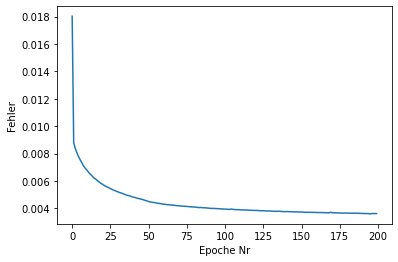

In [85]:
plt.plot(history.history["loss"])
plt.xlabel("Epoche Nr")
plt.ylabel("Fehler")
plt.show()

# Modell testen/anwenden

In [86]:
x_test.shape

(460, 8)

In [87]:
preds = model.predict( x_test )

In [88]:
preds.shape

(460, 1)

In [89]:
type( preds )

numpy.ndarray

In [90]:
y_test[0:5]

array([[0.06540758],
       [0.07096237],
       [0.27371198],
       [0.14165394],
       [0.20288849]])

In [91]:
preds[0:5] # predictions from our model!

array([[0.04800566],
       [0.12629665],
       [0.34312874],
       [0.14473446],
       [0.26901788]], dtype=float32)

In [92]:
preds_dollar = scaler_output.inverse_transform( preds )

In [93]:
preds_dollar.shape

(460, 1)

In [94]:
preds_dollar[:5]

array([[ 69468.875],
       [125846.22 ],
       [281987.   ],
       [139123.28 ],
       [228619.77 ]], dtype=float32)

In [95]:
gt_dollar = scaler_output.inverse_transform( y_test ) # gt = ground-truth = Grundwahrheit

In [96]:
gt_dollar.shape

(460, 1)

In [97]:
gt_dollar[:5]

array([[ 82000.],
       [ 86000.],
       [232000.],
       [136905.],
       [181000.]])

In [98]:
len(y_test)

460

In [99]:
nr_tests = len(y_test)
sum_errors = 0.0
for i in range(0,nr_tests):
    error = gt_dollar[i] - preds_dollar[i]
    print("{0} vs {1} --> Fehler: {2}"
          .format(preds_dollar[i],
                  gt_dollar[i],
                  error ))
    sum_errors += abs(error)
print("Durchschnittlicher Fehler in $:", sum_errors/nr_tests)

[69468.875] vs [82000.] --> Fehler: [12531.125]
[125846.22] vs [86000.] --> Fehler: [-39846.21875]
[281987.] vs [232000.] --> Fehler: [-49987.]
[139123.28] vs [136905.] --> Fehler: [-2218.28125]
[228619.77] vs [181000.] --> Fehler: [-47619.765625]
[137840.11] vs [149900.] --> Fehler: [12059.890625]
[172399.39] vs [163500.] --> Fehler: [-8899.390625]
[77365.37] vs [88000.] --> Fehler: [10634.6328125]
[233302.48] vs [240000.] --> Fehler: [6697.515625]
[126352.19] vs [102000.] --> Fehler: [-24352.1875]
[136346.28] vs [135000.] --> Fehler: [-1346.28125]
[134250.48] vs [100000.] --> Fehler: [-34250.484375]
[166557.16] vs [165000.] --> Fehler: [-1557.15625]
[115901.87] vs [85000.] --> Fehler: [-30901.8671875]
[168352.52] vs [119200.] --> Fehler: [-49152.515625]
[276960.44] vs [227000.] --> Fehler: [-49960.4375]
[228345.44] vs [203000.] --> Fehler: [-25345.4375]
[265295.62] vs [187500.] --> Fehler: [-77795.625]
[224746.72] vs [160000.] --> Fehler: [-64746.71875]
[228521.55] vs [213490.] --> F

# Modell speichern

In [100]:
model.save( "hauspreis_schaetzer" )

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: hauspreis_schaetzer/assets


In [101]:
import pickle
fobj = open("skalierer.pkl", "wb")
pickle.dump(scaler_input, fobj)
pickle.dump(scaler_output, fobj)
fobj.close()

# Modell wiederherstellen und anwenden

In [102]:
from tensorflow import keras
import numpy as np
new_model = keras.models.load_model("hauspreis_schaetzer")

In [103]:
type(new_model)

tensorflow.python.keras.engine.sequential.Sequential

In [104]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 7,921
Trainable params: 7,921
Non-trainable params: 0
_________________________________________________________________


In [105]:
import pickle
fobj = open("skalierer.pkl", "rb")
inp_skalierer = pickle.load(fobj)
out_skalierer = pickle.load(fobj)
fobj.close()

In [106]:
type(inp_skalierer)

sklearn.preprocessing._data.MinMaxScaler

In [107]:
type(out_skalierer)

sklearn.preprocessing._data.MinMaxScaler

In [110]:
baujahr = float( input("Baujahr:") )
groesse = float( input("Grundstücksgröße:") )
bauqualitaet = float( input("Bausubstanzqualität:") )

Baujahr:2010
Grundstücksgröße:1000
Bausubstanzqualität:5


In [111]:
baujahr

2010.0

In [112]:
type(baujahr)

float

In [113]:
input_array = np.array( [baujahr, groesse, bauqualitaet, 0,0,0,1,0 ] )

In [114]:
input_array2d = input_array.reshape( (1,8) )

In [115]:
input_array2d.ndim

2

In [116]:
input_array2d

array([[2.01e+03, 1.00e+03, 5.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00]])

In [117]:
input_skalierte_daten = inp_skalierer.transform( input_array2d )

In [118]:
input_skalierte_daten

array([[ 1.        , -0.00140223,  0.44444444,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]])

In [119]:
preds = new_model.predict( input_skalierte_daten )

In [120]:
preds

array([[0.15684037]], dtype=float32)

In [121]:
preds.ndim

2

In [122]:
preds.shape

(1, 1)

In [123]:
preds_dollar = out_skalierer.inverse_transform( preds )

In [124]:
preds_dollar

array([[147840.75]], dtype=float32)

In [125]:
preds_dollar[0][0]

147840.75

In [126]:
# Programm zum Schätzen von Immobilienpreisen

from tensorflow import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Neuronale Netz wiederherstellen
new_model = keras.models.load_model("hauspreis_schaetzer")

# 2. Skalierer wiederherstellen
import pickle
fobj = open("skalierer.pkl", "rb")
inp_skalierer = pickle.load(fobj)
out_skalierer = pickle.load(fobj)
fobj.close()

# 3. Vom Benutzer Immobiliendaten anfordern/einlesen
baujahr = float( input("Baujahr:") )
groesse = float( input("Grundstücksgröße:") )
bauqualitaet = float( input("Bausubstanzqualität:") )

# 4. Eingabe skalieren auf FeatureRange [0,1]
input_array = np.array( [baujahr, groesse, bauqualitaet, 0,0,0,1,0 ] )
input_array2d = input_array.reshape( (1,8) )
input_skalierte_daten = inp_skalierer.transform( input_array2d )

# 5. Das Neuronale Netz verwenden, um Immobilienpreis vorher zu sagen
preds = new_model.predict( input_skalierte_daten )

# 6. Output des Neuronalen Netzes in Dollar-Range zurück transformieren
preds_dollar = out_skalierer.inverse_transform( preds )

# 7. Den prädizierten Immobilienpreis für den Immobilienmakler ausgeben
print( f"Die Immobilie kann in etwa für {preds_dollar[0][0]} verkauft werden!")

Baujahr:2000
Grundstücksgröße:10
Bausubstanzqualität:5
Die Immobilie kann in etwa für 142620.765625 verkauft werden!


In [127]:
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))
      
zipf = zipfile.ZipFile('nn.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('hauspreis_schaetzer/', zipf)
zipf.close()

In [128]:
import sklearn
sklearn.__version__

'0.23.2'

# Sensitivitätsanalyse

Frage: Wie verändern sich die Prädiktionen unseres Modells in Abhängigkeit ausgewählter Eingabevariablen?

In [129]:
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Neuronale Netz wiederherstellen
new_model = keras.models.load_model("hauspreis_schaetzer")

# 2. Skalierer wiederherstellen
import pickle
fobj = open("skalierer.pkl", "rb")
inp_skalierer = pickle.load(fobj)
out_skalierer = pickle.load(fobj)
fobj.close()

x = []
y = []
for groesse in range(5000,100000,1000):
    baujahr = 2000
    bauqualitaet = 5

    # 4. Eingabe skalieren auf FeatureRange [0,1]
    input_array = np.array( [baujahr, groesse, bauqualitaet, 0,0,0,1,0 ] )
    input_array2d = input_array.reshape( (1,8) )
    input_skalierte_daten = inp_skalierer.transform( input_array2d )

    # 5. Das Neuronale Netz verwenden, um Immobilienpreis vorher zu sagen
    preds = new_model.predict( input_skalierte_daten )

    # 6. Output des Neuronalen Netzes in Dollar-Range zurück transformieren
    preds_dollar = out_skalierer.inverse_transform( preds )
    preds_dollar_scalar = preds_dollar[0][0]
    
    # 7. Baujahr + Prädizierten Verkaufspreis in Listen speichern
    x.append( groesse )
    y.append( preds_dollar_scalar )  


In [130]:
x[:5]

[5000, 6000, 7000, 8000, 9000]

In [131]:
y[:5]

[145161.12, 145670.2, 146179.28, 146688.39, 147197.47]

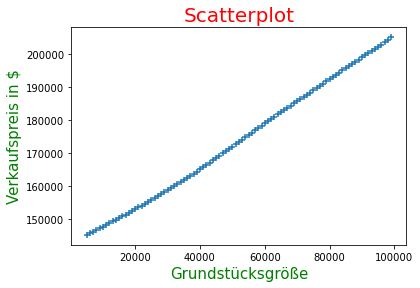

In [132]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker="+")
plt.xlabel("Grundstücksgröße", fontsize=15, color="green")
plt.ylabel("Verkaufspreis in $", fontsize=15, color="green")
plt.title("Scatterplot", fontsize=20, color="red")
plt.show()